### Import Necessary Modules

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Load the data

In [3]:
#Load the dataset
df = pd.read_csv('income_evaluation.csv')
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
print('The shape of the dataset : ', df.shape)


The shape of the dataset :  (32561, 15)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [8]:
#display the categorical variables only
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [9]:
# convert categorical to neumerical values
df_encoded = df.copy()
le = LabelEncoder()

for col in categorical:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head(5)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


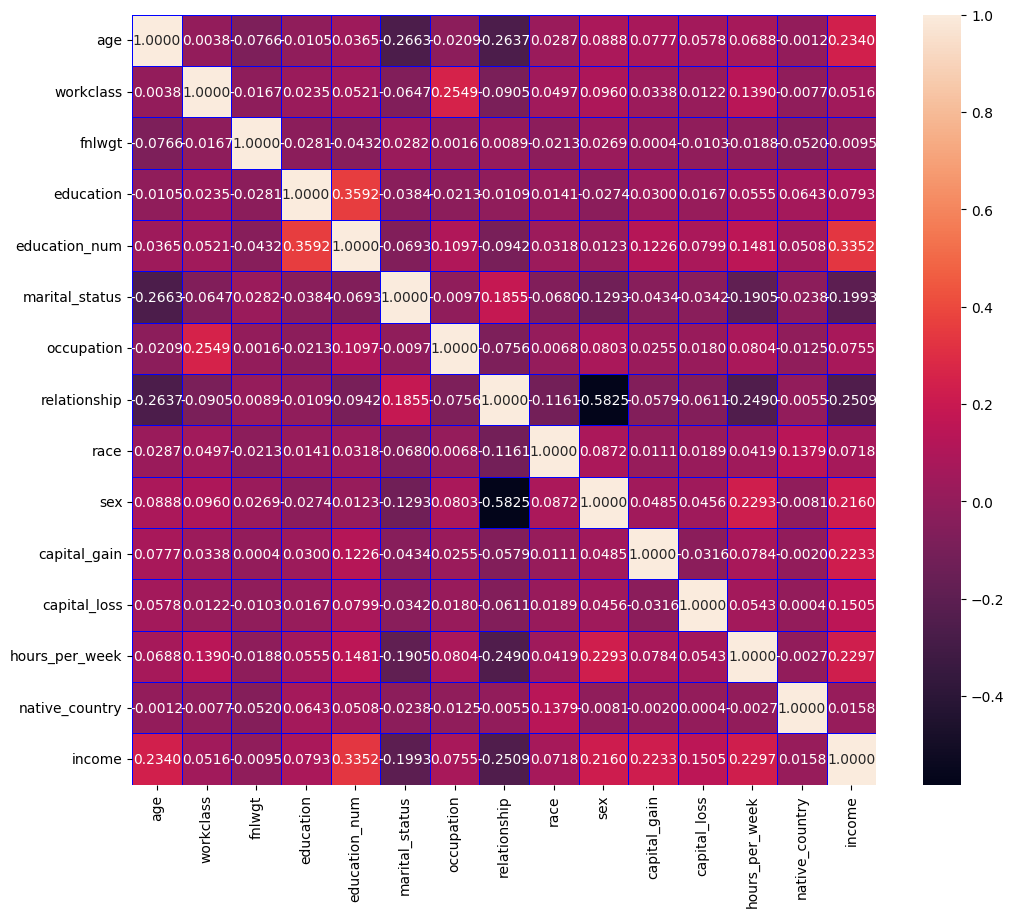

In [10]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df_encoded.corr(), annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

### Train Test Split

In [11]:
# Separate features (X) and target (y)
X = df_encoded.drop('income', axis=1)
y = df_encoded['income'] 

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (22792, 14)
Shape of X_test: (9769, 14)
Shape of y_train: (22792,)
Shape of y_test: (9769,)


In [13]:
# Initialize the Random Forest Classifier
# n_estimators = number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
print("\n...Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training complete.")


...Training the Random Forest model...
Model training complete.


In [14]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Model Evaluation 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")



Model Accuracy: 0.8581


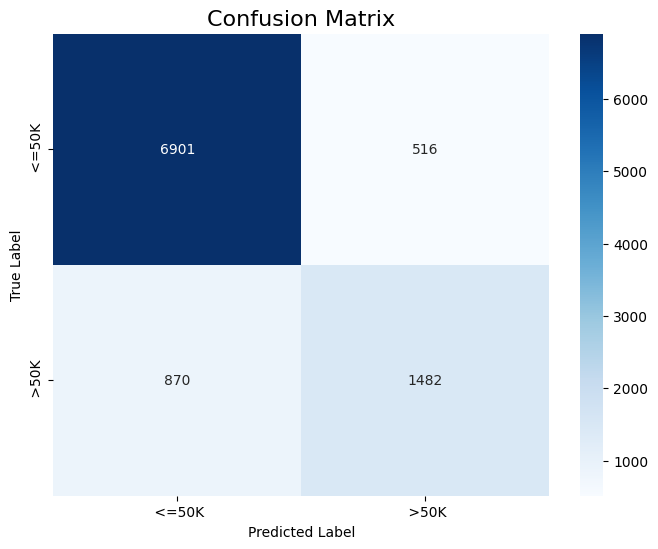

In [15]:
# We need to capture the class names for the 'income' column for later evaluation
income_encoder = LabelEncoder()
income_labels = income_encoder.fit_transform(df['income'])
income_class_names = income_encoder.classes_

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=income_class_names,
            yticklabels=income_class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###  Extract and Visualize Feature Importance

--- Top 10 Most Important Features ---
           Feature  Importance
2           fnlwgt    0.165422
0              age    0.153955
10    capital_gain    0.118003
7     relationship    0.095555
4    education_num    0.091801
12  hours_per_week    0.082766
5   marital_status    0.070164
6       occupation    0.068463
1        workclass    0.040771
11    capital_loss    0.034179


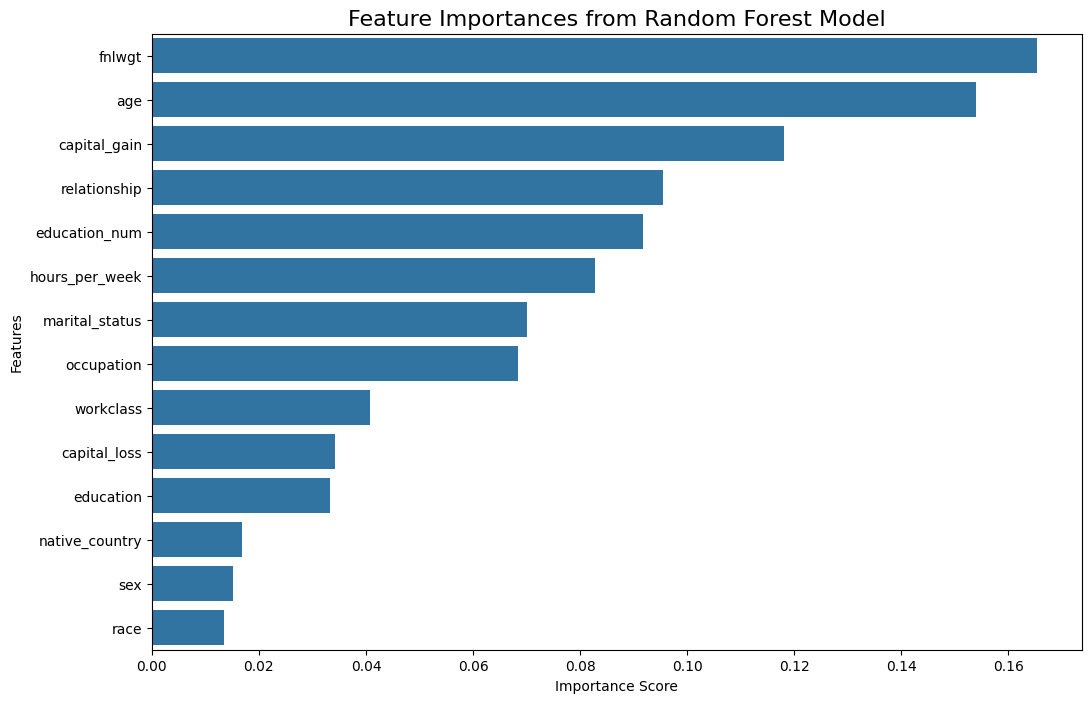

In [16]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("--- Top 10 Most Important Features ---")
print(feature_importance_df.head(10))

# Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### Re-train the Model with Important Features

In [17]:
# Select the top 10 most important features
top_n_features = 10
important_features = feature_importance_df['Feature'].head(top_n_features).tolist()

print(f"\nTraining a new model using the top {top_n_features} features")
print("Selected Features:", important_features)

# Create new training and testing sets with only the selected features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Initialize a new Random Forest Classifier
rf_model_important = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the new model on the smaller dataset
print("\nTraining the new, focused model...")
rf_model_important.fit(X_train_important, y_train)
print("Training complete.")


Training a new model using the top 10 features
Selected Features: ['fnlwgt', 'age', 'capital_gain', 'relationship', 'education_num', 'hours_per_week', 'marital_status', 'occupation', 'workclass', 'capital_loss']

Training the new, focused model...
Training complete.


In [18]:
# Evaluating the New Model
y_pred_important = rf_model_important.predict(X_test_important)
accuracy_important = accuracy_score(y_test, y_pred_important)
print(f"\nAccuracy of Model with Important Features: {accuracy_important:.4f}")



Accuracy of Model with Important Features: 0.8617


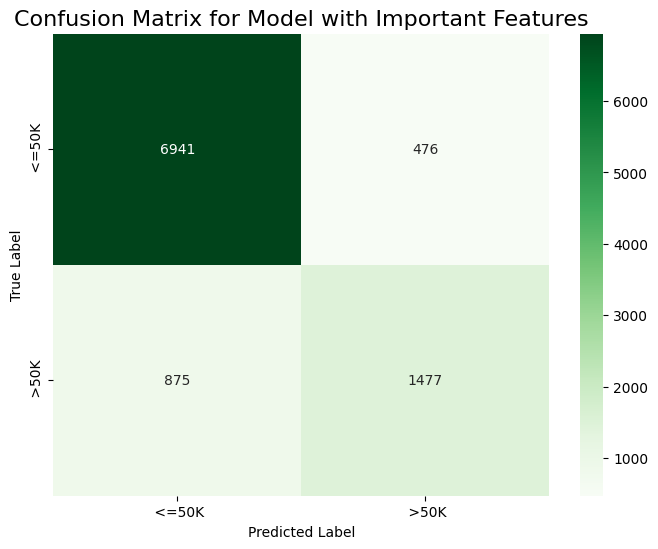

In [19]:
# Confusion Matrix for the new model
cm_important = confusion_matrix(y_test, y_pred_important)

# Visualize the new confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_important, annot=True, fmt='d', cmap='Greens',
            xticklabels=income_class_names,
            yticklabels=income_class_names)
plt.title('Confusion Matrix for Model with Important Features', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()